# US census

### Data Lit  |  Homework Assignment | Logistic Regression

by Denis Volchugin in April 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv ('../Data/adult-training.csv')
test = pd.read_csv ('../Data/adult-test.csv', skiprows=1)

In [3]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [5]:
names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                 "marital_status", "occupation", "relationship", "race", "gender", 
                 "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]

In [6]:
train.columns, test.columns = names, names

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32560,NaN,NaN,NaN,38.5816,13.6406,17,28,37,48,90
workclass,32560,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32560,NaN,NaN,NaN,189782,105550,12285,117832,178363,237054,1.48470e+06
education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32560,NaN,NaN,NaN,10.0806,2.57271,1,9,10,12,16
marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32560,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,16280,NaN,NaN,NaN,38.7683,13.8492,17,28,37,48,90
workclass,16280,9,Private,11209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16280,NaN,NaN,NaN,189433,105718,13492,116716,177830,238384,1.4904e+06
education,16280,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,16280,NaN,NaN,NaN,10.0731,2.56751,1,9,10,12,16
marital_status,16280,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,16280,15,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,16280,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,16280,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,16280,2,Male,10859,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cats = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "gender", "native_country"]

In [10]:
nums = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [11]:
for cat in cats:
    print(cat, ":", train[cat].nunique(), "\n", train[cat].unique(), "\n")

workclass : 9 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital_status : 7 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation : 15 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

relationship : 6 
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race : 5 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

gender : 2 
 [' Male' ' Female'] 



In [12]:
train.replace (' ?', 'Unknown', inplace=True)
test.replace (' ?', 'Unknown', inplace=True)

In [13]:
pd.Series (train.education_num.values, train.education).to_dict()

{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' 1st-4th': 2,
 ' Preschool': 1,
 ' 12th': 8}

In [14]:
T = {' >50K': 1, ' <=50K': 0}

In [15]:
train['target'] = train.income_bracket.map(T)

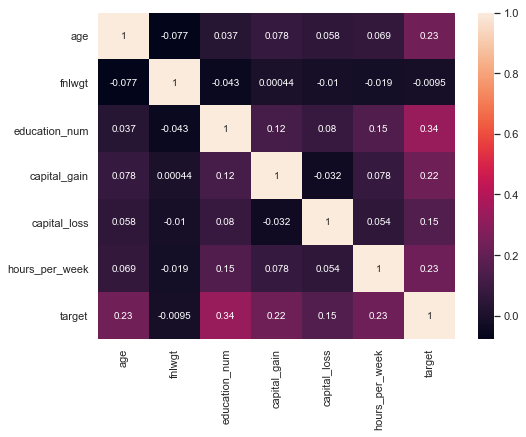

In [16]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix, annot=True);

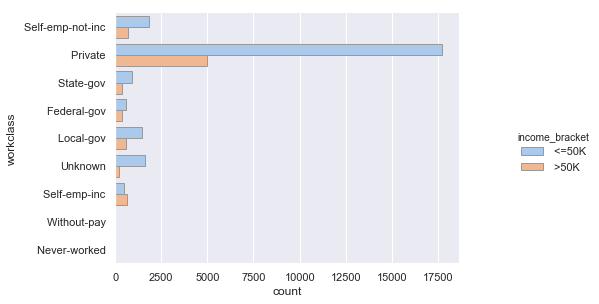

In [17]:
sns.catplot (y="workclass", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [18]:
train.pivot_table (values='target', index='workclass', aggfunc='mean')

,target
workclass,
Federal-gov,0.386458
Local-gov,0.294792
Never-worked,0.000000
Private,0.218673
Self-emp-inc,0.557348
Self-emp-not-inc,0.284927
State-gov,0.272167
Without-pay,0.000000
Unknown,0.104031


In [19]:
WC = {' Self-emp-not-inc': 0, ' Private': 0, ' State-gov': 0, ' Federal-gov': 1,
       ' Local-gov': 0, 'Unknown': 0, ' Self-emp-inc': 1, ' Without-pay': 0,
       ' Never-worked': 0}

In [20]:
train['workclass_num'] = train.workclass.map (WC)

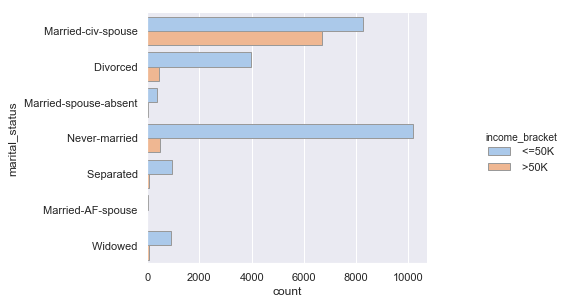

In [21]:
sns.catplot (y="marital_status", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [22]:
train.pivot_table (values='target', index='marital_status', aggfunc='mean')

,target
marital_status,
Divorced,0.104209
Married-AF-spouse,0.434783
Married-civ-spouse,0.446848
Married-spouse-absent,0.081340
Never-married,0.045965
Separated,0.064390
Widowed,0.085599


In [23]:
MS = {' Married-civ-spouse': 1, ' Divorced': 0, ' Married-spouse-absent': 0,
 ' Never-married': 0, ' Separated': 0, ' Married-AF-spouse': 1, ' Widowed': 0}

In [24]:
train['marital_status_num'] = train.marital_status.map (MS)

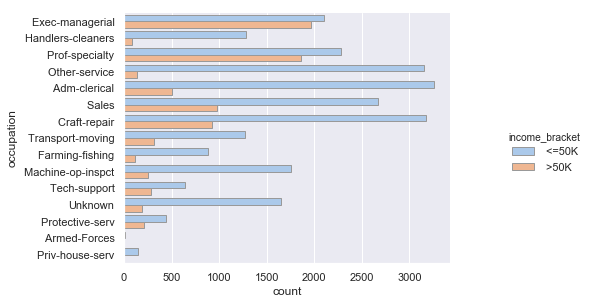

In [25]:
sns.catplot (y="occupation", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [26]:
train.pivot_table (values='target', index='occupation', aggfunc='mean')

,target
occupation,
Adm-clerical,0.134518
Armed-Forces,0.111111
Craft-repair,0.226641
Exec-managerial,0.484014
Farming-fishing,0.115694
Handlers-cleaners,0.062774
Machine-op-inspct,0.124875
Other-service,0.041578
Priv-house-serv,0.006711


In [27]:
OC = {' Exec-managerial': 1, ' Handlers-cleaners': 0, ' Prof-specialty': 1,
 ' Other-service': 0, ' Adm-clerical': 0, ' Sales': 0, ' Craft-repair': 0,
 ' Transport-moving': 0, ' Farming-fishing': 0, ' Machine-op-inspct': 0,
 ' Tech-support': 0, 'Unknown': 0, ' Protective-serv': 0, ' Armed-Forces': 0,
 ' Priv-house-serv': 0}

In [28]:
train['occupation_num'] = train.occupation.map (OC)

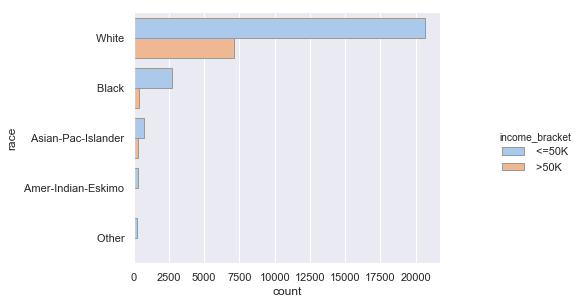

In [29]:
sns.catplot (y="race", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [30]:
train.pivot_table (values='target', index='race', aggfunc='mean')

,target
race,
Amer-Indian-Eskimo,0.115756
Asian-Pac-Islander,0.265640
Black,0.123880
Other,0.092251
White,0.255869


In [31]:
R = {' White': 1, ' Black': 0, ' Asian-Pac-Islander': 1,  ' Amer-Indian-Eskimo': 0, ' Other': 0}

In [32]:
train['race_num'] = train.race.map (R)

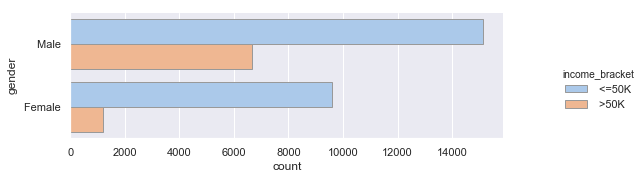

In [33]:
sns.catplot (y="gender", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,2)

In [34]:
train.pivot_table (values='target', index='gender', aggfunc='mean')

,target
gender,
Female,0.109461
Male,0.305751


In [35]:
G = {' Female': 0, ' Male': 1}

In [36]:
train['gender_num'] = train.gender.map (G)

In [37]:
train.pivot_table (values='target', index='native_country', aggfunc='mean').sort_values(by='target', ascending=False)

,target
native_country,
Iran,0.418605
France,0.413793
India,0.400000
Taiwan,0.392157
Japan,0.387097
Yugoslavia,0.375000
Cambodia,0.368421
Italy,0.342466
England,0.333333


In [38]:
NC = {' Iran': 1, ' France': 1, ' India': 1, ' Taiwan': 1, ' Japan': 1, ' Yugoslavia': 1,
       ' Cambodia': 1, ' Italy': 1, ' England': 1, ' Canada': 1, ' Germany': 1,
       ' Philippines': 1, ' Hong': 1, ' Greece': 1, ' China': 1, ' Cuba': 1, 'Unknown': 1,
       ' Scotland': 0, ' United-States': 0, ' Hungary': 0, ' Ireland': 0, ' Poland': 0,
       ' South': 0, ' Thailand': 0, ' Ecuador': 0, ' Jamaica': 0, ' Laos': 0, ' Portugal': 0,
       ' Trinadad&Tobago': 0, ' Puerto-Rico': 0, ' Haiti': 0, ' El-Salvador': 0,
       ' Honduras': 0, ' Vietnam': 0, ' Peru': 0, ' Nicaragua': 0, ' Mexico': 0, ' Guatemala': 0,
       ' Columbia': 0, ' Dominican-Republic': 0, ' Outlying-US(Guam-USVI-etc)': 0,
       ' Holand-Netherlands': 0}

In [39]:
train['native_country_num'] = train.native_country.map(NC)

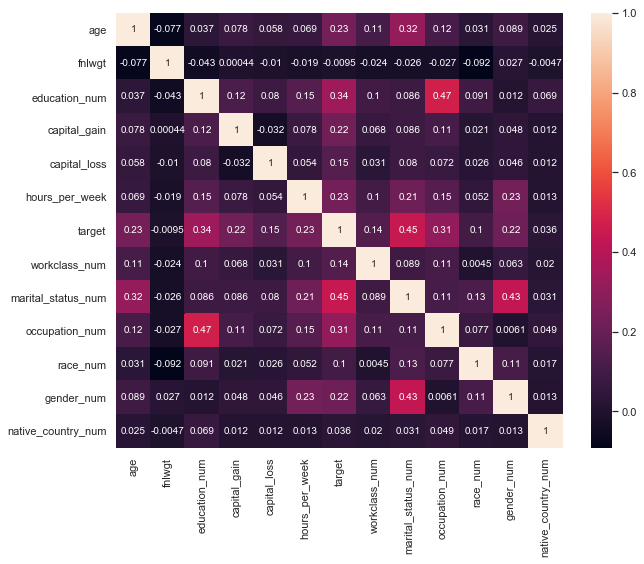

In [40]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True);

In [41]:
corrmatrix.nlargest(10, 'target')['target']

target                1.000000
marital_status_num    0.445281
education_num         0.335182
occupation_num        0.306200
age                   0.234039
hours_per_week        0.229690
capital_gain          0.223333
gender_num            0.215995
capital_loss          0.150523
workclass_num         0.144956
Name: target, dtype: float64

In [42]:
train2 = train[['marital_status_num', 'education_num', 
               'occupation_num', 'age', 'hours_per_week', 'capital_gain', 'gender_num', 'capital_loss', 'workclass_num']]
train2.head()

,marital_status_num,education_num,occupation_num,age,hours_per_week,capital_gain,gender_num,capital_loss,workclass_num
0,1,13,1,50,13,0,1,0,0
1,0,9,0,38,40,0,1,0,0
2,1,7,0,53,40,0,1,0,0
3,1,13,1,28,40,0,0,0,0
4,1,14,1,37,40,0,0,0,0


In [43]:
x_train, x_test, y_train, y_test = train_test_split(train2, train['target'], random_state=60, test_size=0.2)
(x_train.shape, x_test.shape)

((26048, 9), (6512, 9))

In [44]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test);

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [47]:
accuracy_score(y_train_pred, y_train)

0.8457079238329238

In [48]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19752
           1       0.73      0.57      0.64      6296

   micro avg       0.85      0.85      0.85     26048
   macro avg       0.80      0.75      0.77     26048
weighted avg       0.84      0.85      0.84     26048



In [49]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train,y_train)
y_train_pred = randomForest.predict(x_train)

In [50]:
accuracy_score(y_train_pred, y_train)

0.9385749385749386

In [51]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     19752
           1       0.91      0.82      0.87      6296

   micro avg       0.94      0.94      0.94     26048
   macro avg       0.93      0.90      0.91     26048
weighted avg       0.94      0.94      0.94     26048



In [52]:
test['marital_status_num'] = test.marital_status.map (MS)

In [53]:
test['occupation_num'] = test.occupation.map(OC)

In [54]:
test['gender_num'] = test.gender.map(G)

In [55]:
test['workclass_num'] = test.workclass.map(WC)

In [56]:
test2 = test[['marital_status_num', 'education_num', 
               'occupation_num', 'age', 'hours_per_week', 'capital_gain', 'gender_num', 'capital_loss', 'workclass_num']]
test2.head()

,marital_status_num,education_num,occupation_num,age,hours_per_week,capital_gain,gender_num,capital_loss,workclass_num
0,1,9,0,38,50,0,1,0,0
1,1,12,0,28,40,0,1,0,0
2,1,10,0,44,40,7688,1,0,0
3,0,10,0,18,30,0,0,0,0
4,0,6,0,34,30,0,1,0,0


In [57]:
scaler.fit (test2)
test2 = scaler.transform (test2)

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [58]:
y_new_pred = randomForest.predict(test2)

In [59]:
y_new_pred = pd.Series (y_new_pred, name="new_target")

In [60]:
test = pd.concat ([test, y_new_pred], axis=1)

In [61]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,marital_status_num,occupation_num,gender_num,workclass_num,new_target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,1,0,1,0,0
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,1,0,1,0,0
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,1,0,1,0,1
3,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K.,0,0,0,0,0
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,0,1,0,0


In [62]:
OT = {' <=50K.': 0, ' >50K.': 1}

In [63]:
test['old_target'] = test.income_bracket.map(OT)

In [74]:
test.pivot_table (values='income_bracket', index=['new_target', 'old_target' ], aggfunc='count')

income_bracket
new_target old_target                
0          0                    11417
           1                     1529
1          0                     1017
           1                     2317